# Extract Features

1. Read csv files and load as dfs
2. Combine dfs
3. Get POS, NER
4. Save in new features_df
5. Get semantic cosine similarity

In [1]:
import os, sys

import pandas as pd

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

import log_files
from log_files import LogData
from data_processing import DataProcessing
from feature_extraction import SpacyFeatureExtraction

In [2]:
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
base_data_path = os.path.join(notebook_dir, '../data')

In [4]:
predictions_base_path = os.path.join(base_data_path, 'prediction_logs')
predictions = True
predictions_df = log_files.read_data(notebook_dir, predictions_base_path, predictions)
predictions_df.head(3)

Start logging batch
log_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/prediction_logs
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/prediction_logs/batch_1-prediction
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/prediction_logs/batch_1-prediction/batch_1-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/prediction_logs/batch_2-prediction
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/prediction_logs/batch_2-prediction/batch_2-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/pr

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,JPMorgan Chase forecasts that the net profit at Amazon potentially decrease in Q3 of 2027.,1,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,1
1,"On August 21, 2024, Bank of America speculates the revenue at Microsoft will likely increase.",1,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,2
2,"Citigroup predicts on 2024-08-21, the operating income at Alphabet may rise.",1,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,3


In [5]:
# observations_base_path = os.path.join(base_data_path, 'observation_logs')
# predictions = False
# observations_df = log_files.read_data(notebook_dir, observations_base_path, predictions)
# observations_df.head(3)

observations_path = os.path.join(base_data_path, 'observation_logs/batch_5-observation/batch_5-from_df.csv')
observations_df = DataProcessing.load_from_file(observations_path, 'csv')
observations_df

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,JPMorgan Chase observed that the net profit at Amazon had remained stable in Q2 2026.,0,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,1
1,"On 08/20/2024 to 08/20/2025, Bank of America speculated the operating income at Microsoft changed.",0,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,2
2,"Citigroup noted on 2024-08-20, the research and development expenses at Alphabet fell.",0,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,3
3,"According to a financial analyst, the gross profit at Facebook rose in Q3 2025.",0,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,4
4,"In 2025-08-20, a college student envisioned that the operating cash flow at Intel decreased.",0,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,5
5,"The stock price at Google increased in August 2025, according to a research advisor.",0,finance,llama-3.1-70b-instruct,NAVI_GATOR,0,6
6,"JPMorgan Chase noted that the operating income at Microsoft had risen significantly on September 10, 2024.",0,finance,llama-3.3-70b-instruct,NAVI_GATOR,0,1
7,"On November 20, 2023, to December 31, 2024, Citigroup speculated the research and development expenses at Amazon changed.",0,finance,llama-3.3-70b-instruct,NAVI_GATOR,0,2
8,"Bank of America observed that on October 15, 2024, the net profit at General Motors fell sharply.",0,finance,llama-3.3-70b-instruct,NAVI_GATOR,0,3
9,"According to Visa, the transaction volume at Walmart rose substantially in the second quarter of 2027.",0,finance,llama-3.3-70b-instruct,NAVI_GATOR,0,4


## Get Sentences Only

In [6]:
prediction_sentences = DataProcessing.df_to_list(predictions_df, 'Base Sentence')
observation_sentences = DataProcessing.df_to_list(observations_df, 'Base Sentence')

## Embed Sentences

In [7]:
prediction_spacy_fe = SpacyFeatureExtraction(predictions_df, 'Base Sentence')
observation_spacy_fe = SpacyFeatureExtraction(observations_df, 'Base Sentence')

prediction_embedding_df = prediction_spacy_fe.sentence_feature_extraction(attach_to_df=True)
observations_embedding_df = observation_spacy_fe.sentence_feature_extraction(attach_to_df=True)

100%|██████████| 206/206 [00:00<00:00, 283.68it/s]


In [8]:
import numpy as np
prediction_embeddings = np.array(prediction_embedding_df["Embedding"].to_list())
prediction_embeddings

array([[-0.3040466 ,  0.22634023, -0.04487374, ..., -0.05285362,
        -0.07752944, -0.00129331],
       [-0.18284982,  0.31618637,  0.05471527, ..., -0.09088906,
        -0.14025599,  0.0647388 ],
       [-0.16487946,  0.39756328,  0.05446182, ..., -0.05565093,
         0.07685453,  0.09226657],
       ...,
       [-0.17146575,  0.26608437,  0.0280841 , ..., -0.03757495,
        -0.0450466 ,  0.0277536 ],
       [-0.0412313 ,  0.19600584, -0.12965174, ..., -0.00300583,
        -0.05918996,  0.04199361],
       [-0.00934113,  0.1699375 ,  0.06309292, ..., -0.05458365,
        -0.03622751,  0.04958627]], dtype=float32)

In [9]:
observation_embeddings = np.array(observations_embedding_df["Embedding"].to_list())
observation_embeddings

array([[-0.2123913 ,  0.17799488, -0.05324987, ..., -0.02688187,
        -0.09497418,  0.0064435 ],
       [-0.13267156,  0.14998312, -0.00147168, ...,  0.03780744,
        -0.09166919,  0.07035895],
       [-0.13628061,  0.28739893,  0.01525788, ..., -0.00785855,
         0.01606433,  0.09658783],
       ...,
       [-0.03088341,  0.21911228,  0.02546012, ...,  0.00622017,
        -0.09755052,  0.08650242],
       [-0.11411976,  0.14840828, -0.10418813, ..., -0.00923048,
        -0.06912002,  0.15106782],
       [ 0.04153518,  0.16806215, -0.0699471 , ..., -0.06107089,
         0.02350299,  0.20676048]], dtype=float32)

## Cluster

### KMeans

In [10]:

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import numpy as np

def plot_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X)
    print(kmeans.labels_)


    # Get cluster labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    # Plot data points colored by cluster labels
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100, alpha=0.6)
    # Plot cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X')

    # Add title and axis labels
    plt.title('KMeans Clustering Scatter Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Show the plot
    plt.show()


In [11]:
### GET #clusers, where #clusers = #domains
domain = prediction_embedding_df["Domain"].unique()
domain

array(['finance', 'health', 'policy', 'weather', 'sport', 'miscellaneous'],
      dtype=object)

[1 1 1 0 0 0]


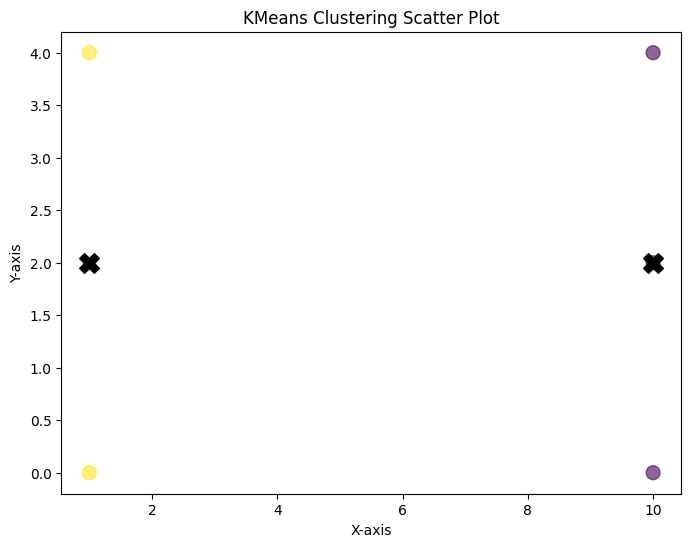

[1 5 3 0 5 0 1 5 3 0 0 3 4 5 4 4 0 4 4 4 5 4 4 4 4 0 5 0 0 0 3 0 3 0 3 3 3
 5 5 5 5 3 3 3 5 5 3 3 2 2 2 2 2 2 2 2 3 2 5 2 1 5 5 0 3 0 1 5 5 5 3 2 0 1
 5 0 0 0 1 0 5 0 3 0 4 4 3 4 4 4 4 4 3 4 4 3 0 0 3 0 0 0 4 0 0 0 4 0 5 5 0
 5 0 0 3 0 3 0 3 3 2 3 3 2 2 2 2 2 2 2 0 2 1 0 0 0 0 0 1 0 1 3 0 0 1 5 3 1
 0 0 1 3 5 0 0 5 0 5 1 0 0 0 1 5 3 1 1 0 1 5 5 1 0 5 1 0 0 0 3 0 4 5 4 4 0
 4 4 3 4 4 0 4 4 4 4 4 4 4 4 5 5 4 0 5 4 5 4 4 4 4 4 4 3 4 4 4 4 0 5 0 0 0
 1 3 5 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 4 4 0 3 0 0 4 5 5 5 5 5 3
 3 5 5 3 3 5 5 0 2 5 5 3 5 5 2 5 5 1 5 5 0 5 5 0 3 5 0 0 0 2 2 5 3 2 2 2 2
 5 2 2 2 2 3 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 0 0 1 5 5 5 0 0 1 5 5 5 0
 0 1 0 5 0 0 0 5 5 5 1 0 0 1 5 5 0 0 0 1 0 0 0 0 3 1 3 5 3 0 0 1 5 1 1 3 0
 4 4 4 4 3 4 4 4 3 4 5 4 1 3 5 3 0 3 3 0 5 0 0 5 5 5 5 3 0 0 4 3 5 5 5 5 2
 3 2 2 2 2 2 2 3 2 2 2 1 5 5 5 3 2 1 5 5 0 0 0 1 5 1 0 3 1 3 5 3 0 0 4 0 4
 4 0 4 3 3 4 3 4 4 0 0 0 0 1 0 5 5 0 0 4 5 5 5 5 3 5 5 0 5 3 2 2 2 2 0 2 2
 2 2 0 3 1 1 5 0 0 1 5 5 

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


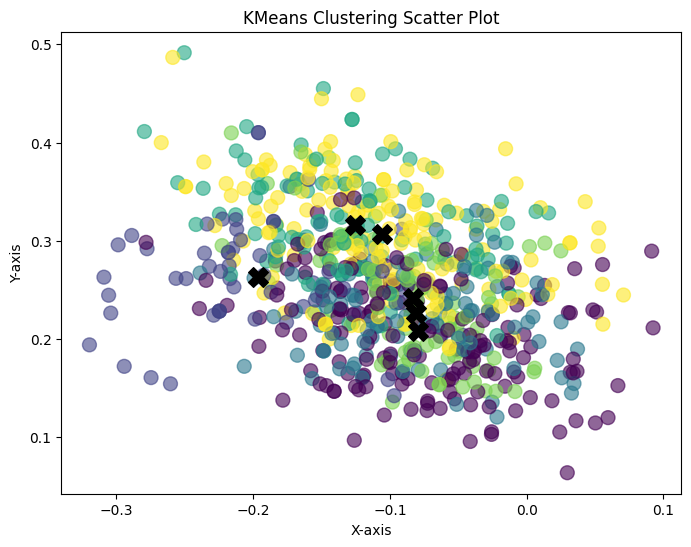

[5 5 0 5 0 5 5 0 2 5 5 5 5 2 2 5 1 5 4 0 4 5 5 5 5 2 2 5 5 5 5 5 2 5 5 5 3
 3 1 1 3 3 3 3 0 1 1 3 3 3 0 1 1 1 3 0 0 0 3 0 3 3 4 3 3 1 3 3 3 3 3 3 3 2
 2 3 5 5 3 2 3 2 3 5 3 2 2 5 5 5 2 3 2 2 3 5 3 2 2 5 2 2 3 0 1 5 2 5 0 0 0
 4 0 0 0 0 4 4 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 1 0 3 1 4 4 4 4 4 4 4 4 4
 4 4 4 2 0 4 4 2 4 4 4 4 4 4 4 4 4 2 4 4 1 4 5 4 4 4 1 5 1 4 4 2 4 2 5 2 2
 5 5 5 1 4 4 4 1 0 1 2 2 5 3 2 2 2 5 5 5 2]


/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


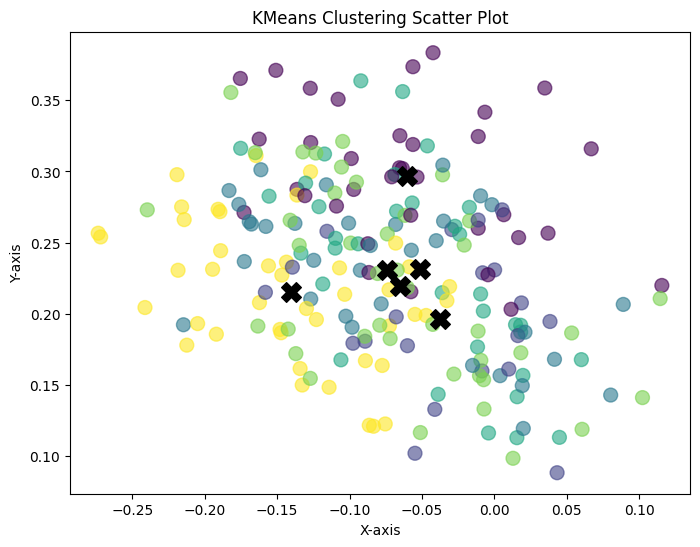

In [12]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
plot_clusters(X, 2)
plot_clusters(prediction_embeddings, len(domain))
plot_clusters(observation_embeddings, len(domain))

## Combine Predictions and Observations + Plot

[[-0.3040466   0.22634023 -0.04487374 ... -0.05285362 -0.07752944
  -0.00129331]
 [-0.18284982  0.31618637  0.05471527 ... -0.09088906 -0.14025599
   0.0647388 ]
 [-0.16487946  0.39756328  0.05446182 ... -0.05565093  0.07685453
   0.09226657]
 ...
 [-0.03088341  0.21911228  0.02546012 ...  0.00622017 -0.09755052
   0.08650242]
 [-0.11411976  0.14840828 -0.10418813 ... -0.00923048 -0.06912002
   0.15106782]
 [ 0.04153518  0.16806215 -0.0699471  ... -0.06107089  0.02350299
   0.20676048]]
[1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


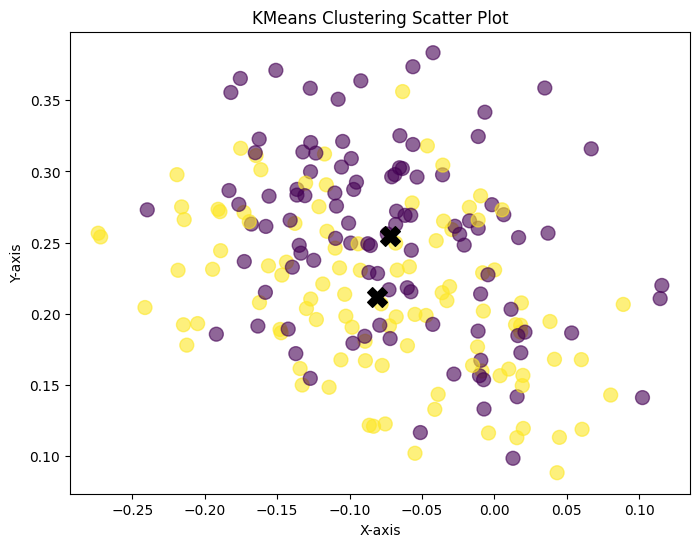

In [13]:
embeddings = np.concatenate((prediction_embeddings, observation_embeddings))
print(embeddings)
plot_clusters(observation_embeddings, 2)